In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import re
import matplotlib.colors
import matplotlib as mpl

In [2]:
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', 1000)

In [52]:
df=pd.read_csv('database/extra/data_clean_8May.csv')

In [4]:
df.shape

(91670, 58)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91670 entries, 0 to 91669
Data columns (total 58 columns):
Unnamed: 0        91670 non-null object
idx               91669 non-null float64
_No               91669 non-null float64
Month             91669 non-null float64
Time              91669 non-null object
Place_refer       91669 non-null object
State             91670 non-null object
Radial            91669 non-null float64
Distance          91669 non-null float64
MCondition        91669 non-null object
Visibility        91669 non-null object
Light             91669 non-null object
Ceiling           91669 non-null object
AC1_ATC           91669 non-null object
AC1_Operator      91669 non-null object
AC1_Model         91669 non-null object
AC1_Crew          91669 non-null object
AC1_Rule          91669 non-null object
AC1_FP            91669 non-null object
AC1_Mission       91669 non-null object
AC1_Nav           91669 non-null object
AC1_Phase         91669 non-null object
AC1_Ro

###### What is the Altitude distribution for Air conflict issues?

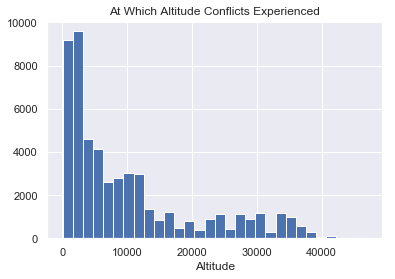

In [621]:
sns.set()
plt.hist(df.Altitude,bins=30,range=(10,47000))
plt.title('At Which Altitude Conflicts Experienced')
plt.xlabel('Altitude')
plt.show()

##### Where did Conflict issues happen? What was the position of Aircraft relative to the Airport?

In [618]:
df.Radial.value_counts().sort_index().head()

0.0    76926
1.0       16
2.0       21
2.5        1
3.0        9
Name: Radial, dtype: int64

In [619]:
df.Distance.value_counts().sort_values().head()

575.0    1
172.0    1
10.5     1
103.0    1
62.5     1
Name: Distance, dtype: int64

In [53]:
position=df[~((df.Distance==0) & (df.Radial==0))][['Distance','Radial','Altitude']]

In [38]:
position0=df[df.Distance==0][df.Radial==0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [45]:
position_index=pd.Index(df.idx).difference(pd.Index(position0.idx))

In [48]:
position_index.shape

(44318,)

In [44]:
14225+29575+518

44318

In [60]:
position1=df[df.idx.isin(position_index)]

In [179]:
position.shape

(44318, 3)

In [61]:
position1.shape

(44318, 58)

#### Polar charts are the best way to show the positoins of Aircraft. 3D can be defined as Radial, Distance and Altitude. Is there more common positions for conflict issues?

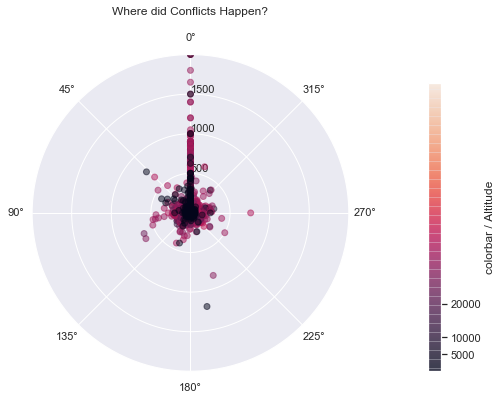

In [622]:
dec = position.Distance
ra = position.Radial
n=position.Altitude

ra = [x/180.0*3.141593 for x in ra]
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,1.1,1.1],polar=True)
ax.set_ylim(0,2000)
ax.set_yticks(np.arange(0,2000,500))
ax.set_rlabel_position(0)
#colors=['k' if a < 5000 else 'b' if a < 20000 else 'g' for a in n]
sc=ax.scatter(ra,dec,c = n,alpha=0.5)
ax.set_theta_zero_location('N', offset=0)
ax.set_title("Where did Conflicts Happen?", va='bottom',y=1.1)
cax = fig.add_axes([1.2,0.1,0.03,1])
fig.colorbar(sc, cax=cax, label="colorbar / Altitude", ticks=[5000,10000,20000])
plt.subplots_adjust(top=0.8)
plt.show()

#### We know that in general, conflicts happen within 500 NM of the Airports. Let's see how is the distribution of events with in 500NM?

In [181]:
position500=position[~((position.Radial==0)&(position.Distance>500))]

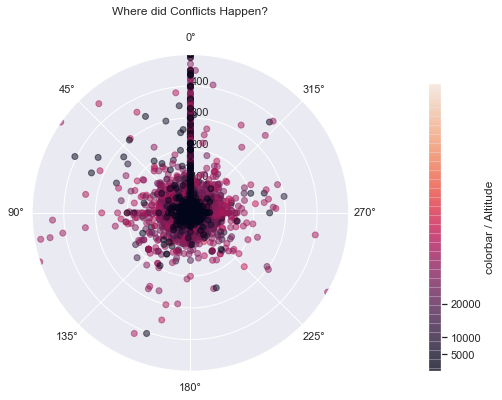

In [623]:
dec = position500.Distance
ra = position500.Radial
n= position500.Altitude

ra = [x/180.0*3.141593 for x in ra]
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,1.1,1.1],polar=True)
ax.set_ylim(0,500)
ax.set_yticks(np.arange(0,500,100))
ax.set_rlabel_position(0)
#colors=['k' if a < 5000 else 'b' if a < 20000 else 'g' for a in n]
sc=ax.scatter(ra,dec,c = n,alpha=0.5)
ax.set_theta_zero_location('N', offset=0)
ax.set_title("Where did Conflicts Happen?", va='bottom',y=1.1)
cax = fig.add_axes([1.2,0.1,0.03,1])
fig.colorbar(sc, cax=cax, label="colorbar / Altitude", ticks=[5000,10000,20000])
plt.subplots_adjust(top=0.8)
plt.show()

##### I think closer to the Airport the incidents are more likely to happen. How about Altitude? It is decreasing in closer areas. Inside 200NM is the big chunk of events.

In [183]:
position200=position[~(position.Distance>200)]

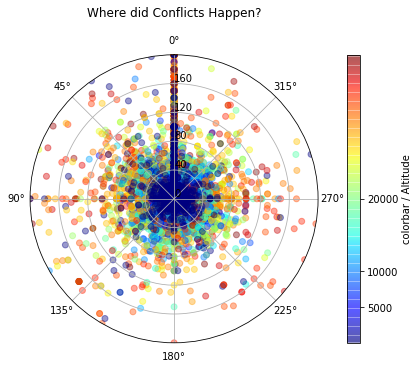

In [272]:
dec = position200.Distance
ra = position200.Radial
n=position200.Altitude

ra = [x/180.0*3.141593 for x in ra]
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,1,1],polar=True)
ax.set_ylim(0,200)
ax.set_yticks(np.arange(0,200,40))
ax.set_rlabel_position(0)
norm = matplotlib.colors.Normalize(vmin=100.0, vmax=40000.0)
#colors=['k' if a < 5000 else 'b' if a < 20000 else 'g' for a in n]
sc=ax.scatter(ra,dec,c =n,marker='o',alpha=0.4, cmap='jet',norm=norm)
ax.set_theta_zero_location('N', offset=0)
ax.set_title("Where did Conflicts Happen?", va='bottom', y=1.1)
cax = fig.add_axes([1,0.1,0.03,1])
fig.colorbar(sc, cax=cax, label="colorbar / Altitude", ticks=[5000,10000,20000])
plt.subplots_adjust(top=0.8)
plt.show()

#### And Lastly within 40 NM the Altitude seems to be very low during a conflict. Is it?

In [54]:
position40=position[~(position.Distance>40)]

In [55]:
position40['colors']=np.where(position40['Altitude']<=1000,'k','None')
position40['colors']=np.where((position40['Altitude']<=5000)&(position40['Altitude']>1000),'magenta',position40['colors'])
position40['colors']=np.where((position40['Altitude']<=10000)&(position40['Altitude']>5000),'b',position40['colors'])
position40['colors']=np.where(position40['Altitude']>10000,'y',position40['colors'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [56]:
np.unique(position40.colors, return_counts=True)

(array(['None', 'b', 'k', 'magenta', 'y'], dtype=object),
 array([    1,  7266,  8336, 14994,  8181], dtype=int64))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


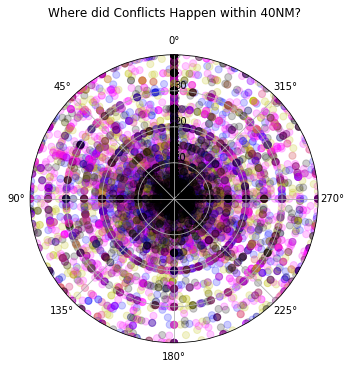

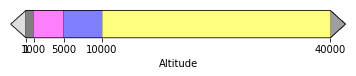

In [70]:
dec = position40.Distance
ra = position40.Radial
n=position40.Altitude
colors=position40.colors


ra = [x/180.0*3.141593 for x in ra]
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,1,1],polar=True)
ax.set_ylim(0,40)
ax.set_yticks(np.arange(0,40,10))
norm = matplotlib.colors.Normalize(vmin=100.0, vmax=40000.0)
cmap=matplotlib.colors.ListedColormap(colors)
sc=ax.scatter(ra,dec,c =n ,marker='.',alpha=0.2,norm=norm,cmap=cmap,s=200)
ax.set_theta_zero_location('N', offset=0)
ax.set_title("Where did Conflicts Happen within 40NM?", va='bottom', y=1.1)
#cax = fig.add_axes([1,0.1,0.03,1])
#fig.colorbar(sc, cax=cax, label="colorbar / Altitude", ticks=[1000,5000,10000])
ax.set_rlabel_position(0)


fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
#cmap = mpl.cm.cool
#norm = mpl.colors.Normalize(vmin=0, vmax=40000)
#cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,norm=norm,orientation='horizontal')

cmap = mpl.colors.ListedColormap(['black', 'magenta', 'blue', 'yellow'])
cmap.set_over('0.25')
cmap.set_under('0.75')

bounds = [1,1000, 5000, 10000, 40000]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=[0] + bounds + [40001],
                                extend='both',
                                ticks=bounds,
                                spacing='proportional',
                                orientation='horizontal',alpha=0.5)
cb2.set_label('Altitude')
fig.show()
#plt.colorbar()
plt.show()

#### How was the Meteorological conditions at the time of conflict?

In [294]:
MTO=df.MCondition.value_counts()
MTO

VMC         56740
None        16851
IMC         10041
Mixed        5585
Marginal     2452
Name: MCondition, dtype: int64

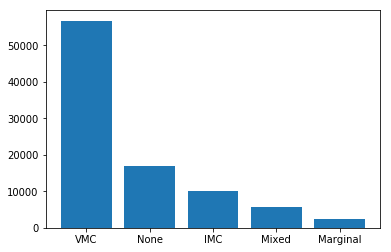

In [375]:
plt.bar(MTO.index,MTO.values, color=None, width=0.8)
plt.show()

In [620]:
df.Visibility.value_counts().head(40)

None                        56223
10                           6102
10.0                         3584
20.0                         1857
15.0                         1540
5.0                          1495
7.0                           952
20                            836
Turbulence                    814
50.0                          767
3.0                           751
5                             724
Thunderstorm                  720
30.0                          697
6                             603
6.0                           575
2.0                           523
4.0                           515
15                            435
7                             400
50                            395
8.0                           375
30                            368
25.0                          356
1.0                           328
3                             310
40.0                          308
Rain                          290
1.5                           258
12.0          

In [345]:
Light=df.Light.value_counts()
Light

Daylight    65948
Night       18342
Dusk         4115
None         1793
Dawn         1471
Name: Light, dtype: int64

In [379]:
Time=df.Time.value_counts()
Time

1201-1800    36590
0601-1200    28929
1801-2400    19212
0001-0600     5042
None          1896
Name: Time, dtype: int64

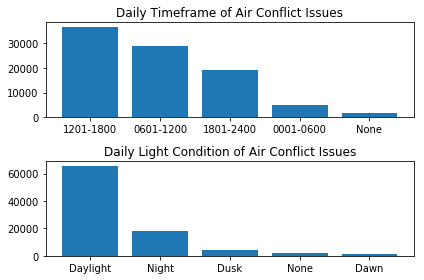

In [380]:
plt.subplot(2,1,1)
plt.bar(Time.index, Time.values)
plt.title('Daily Timeframe of Air Conflict Issues')
plt.tight_layout()
plt.subplot(2,1,2)
plt.bar(Light.index, Light.values)
plt.title('Daily Light Condition of Air Conflict Issues')
plt.tight_layout()

#### According to the Assessment made by the reporters, primary factor of th air conflict ioncidents are listed as follows:

In [33]:
Pri_problem=df.Pri_Problem.value_counts()
Pri_problem

Human Factors                                   67311
Ambiguous                                        5259
Procedure                                        4122
None                                             3598
Weather                                          3017
Company Policy                                   2582
Aircraft                                         1428
ATC Equipment / Nav Facility / Buildings          910
Chart Or Publication                              894
Airspace Structure                                881
Airport                                           799
Environment - Non Weather Related                 553
Staffing                                          109
Equipment / Tooling                               104
Manuals                                            80
MEL                                                12
Incorrect / Not Installed / Unavailable Part        8
Logbook Entry                                       2
Name: Pri_Problem, dtype: in

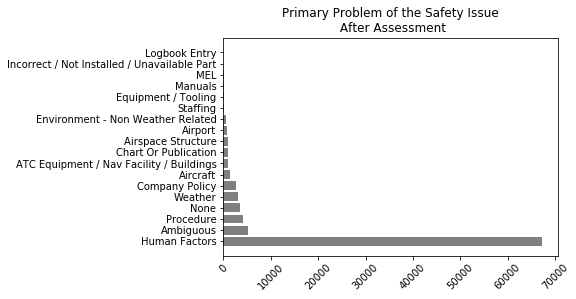

In [34]:
plt.barh(Pri_problem.index,Pri_problem.values, color='gray')
plt.title('Primary Problem of the Safety Issue\n After Assessment')
plt.xticks(rotation=45)
plt.show()

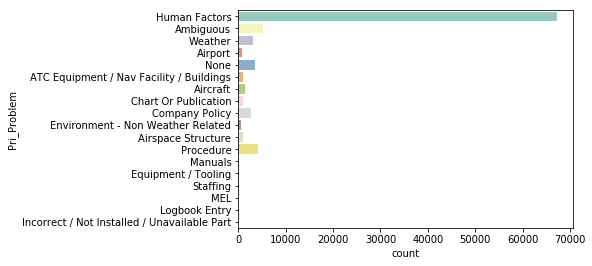

In [50]:
sns.countplot(y='Pri_Problem',data=df,palette='Set3',orient='v')

#### How about the local tendencies? Here is the top states for conflict issues.

In [331]:
State=df.State.value_counts()
State=State[~(State.values<1000)]
State

CA      11855
None     8845
TX       5786
FL       5400
NY       4211
FO       3726
IL       3502
NJ       3036
PA       2764
VA       2582
OH       2523
CO       2505
GA       2492
AZ       2102
NC       1892
MI       1819
WA       1816
NV       1631
TN       1528
IN       1513
MD       1391
MO       1237
MA       1102
UT       1082
DC       1064
MN       1033
AK       1027
Name: State, dtype: int64

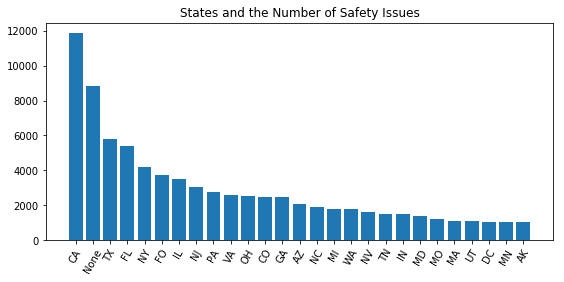

In [532]:
plt.bar(State.index, State.values)
plt.xticks(rotation=60)
plt.title('States and the Number of Safety Issues')
plt.subplots_adjust(right=1.3)
plt.show()

In [606]:
df.AC1_Phase.value_counts().head(20)

Cruise                        22035
Initial Approach              15088
Descent                       14010
Climb                         12789
Parked                         6805
Landing                        4753
Initial Climb                  4612
Takeoff                        2992
None                           2964
Final Approach                 2401
Taxi                           2056
Other Pattern                   416
Other Airhold                   262
Other Other                     260
Other Low Level High Speed       23
Other Non-Flight                 15
Other Holding Pattern            13
Other Abort                      10
Other Divert                      9
Other VFR Traffic Pattern         9
Name: AC1_Phase, dtype: int64

In [444]:
Phases=['Parked','Taxi','Takeoff','Climb','Cruise','Descent','Initial Approach','Final Approach','Landing','None']

In [601]:
Phase_df=df.AC1_Phase.str.split(';')
Phase_df=Phase_df.str.get(0)
df['AC1_Phase']=Phase_df
df.AC1_Phase.value_counts().head(11)

Cruise              22035
Initial Approach    15088
Descent             14010
Climb               12789
Parked               6805
Landing              4753
Initial Climb        4612
Takeoff              2992
None                 2964
Final Approach       2401
Taxi                 2056
Name: AC1_Phase, dtype: int64

In [485]:
df.drop(df.tail(1).index,inplace=True)
df.shape

(91668, 58)

#### Different phases of flight has different risk levels. Which phase is the riskiest for air conflicts?

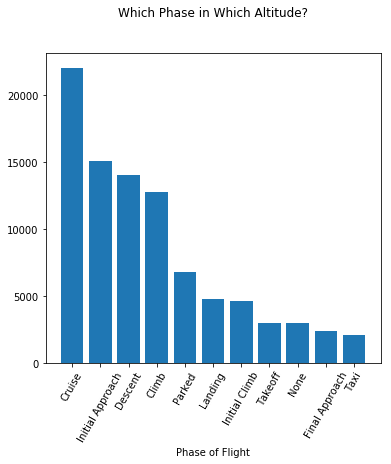

In [492]:
plt.bar(df.AC1_Phase.value_counts().head(11).index,df.AC1_Phase.value_counts().head(11).values)
plt.xticks(rotation=60)
plt.xlabel('Phase of Flight')
plt.title('Which Phase in Which Altitude?',y=1.1)
plt.subplots_adjust(top=1.2)
plt.show()

In [374]:
column_names=['Time','Place_refer','State','Radial','Distance','Altitude','MCondition','Visibility','Light',
                 'Ceiling','AC1_ATC','AC1_Operator','AC1_Model','AC1_Crew','AC1_Rule','AC1_FP','AC1_Mission','AC1_Nav',
                 'AC1_Phase','AC1_Route','AC1_Airspace','AC1_Seats','AC1_Passengers','AC2_ATC','AC2_Operator','AC2_Model',
                  'AC2_Crew','AC2_Rule','AC2_FP','AC2_Mission','AC2_Nav','AC2_Phase','AC2_Route','AC2_Airspace','AC2_Seats',
                  'AC2_Passengers','P1_Loc','P1_Org','P1_Func','P1_Qual','P1_Experience','P1_HumaFactor','P2_Loc','P2_Org',
                  'P2_Func','P2_Qual','P2_Experience','Anomaly','Detector','Result','Other_Factors','Pri_Problem','Narrative',
                  'Synopsis']
none_value_counts={}
for col_name in column_names:
    if df[col_name].value_counts().index.contains('None'):
        colx=df[col_name].value_counts()['None']
    else:
        colx=0
    none_value_counts[col_name]=colx
none_value_counts

{'Time': 1896,
 'Place_refer': 2215,
 'State': 8845,
 'Radial': 0,
 'Distance': 0,
 'Altitude': 0,
 'MCondition': 16851,
 'Visibility': 56224,
 'Light': 1793,
 'Ceiling': 69580,
 'AC1_ATC': 13086,
 'AC1_Operator': 3794,
 'AC1_Model': 1149,
 'AC1_Crew': 5191,
 'AC1_Rule': 27422,
 'AC1_FP': 13975,
 'AC1_Mission': 7824,
 'AC1_Nav': 77660,
 'AC1_Phase': 2964,
 'AC1_Route': 46576,
 'AC1_Airspace': 21339,
 'AC1_Seats': 0,
 'AC1_Passengers': 0,
 'AC2_ATC': 77935,
 'AC2_Operator': 70937,
 'AC2_Model': 60503,
 'AC2_Crew': 68154,
 'AC2_Rule': 74455,
 'AC2_FP': 71992,
 'AC2_Mission': 75126,
 'AC2_Nav': 90354,
 'AC2_Phase': 63525,
 'AC2_Route': 81993,
 'AC2_Airspace': 77182,
 'AC2_Seats': 0,
 'AC2_Passengers': 0,
 'P1_Loc': 42254,
 'P1_Org': 597,
 'P1_Func': 627,
 'P1_Qual': 7149,
 'P1_Experience': 18389,
 'P1_HumaFactor': 73761,
 'P2_Loc': 61262,
 'P2_Org': 22340,
 'P2_Func': 20678,
 'P2_Qual': 38433,
 'P2_Experience': 77110,
 'Anomaly': 0,
 'Detector': 1982,
 'Result': 6823,
 'Other_Factors': 38

In [588]:
df.dropna(thresh=50000,axis='columns').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91668 entries, 0 to 91667
Data columns (total 58 columns):
Unnamed: 0        91668 non-null object
idx               91668 non-null float64
_No               91668 non-null float64
Month             91668 non-null datetime64[ns]
Time              91668 non-null object
Place_refer       91668 non-null object
State             91668 non-null object
Radial            91668 non-null float64
Distance          91668 non-null float64
MCondition        91668 non-null object
Visibility        91668 non-null object
Light             91668 non-null object
Ceiling           91668 non-null object
AC1_ATC           91668 non-null object
AC1_Operator      91668 non-null object
AC1_Model         91668 non-null object
AC1_Crew          91668 non-null object
AC1_Rule          91668 non-null object
AC1_FP            91668 non-null object
AC1_Mission       91668 non-null object
AC1_Nav           91668 non-null object
AC1_Phase         91668 non-null object

In [433]:
Airspace=df[~(df.AC1_Airspace=='None')]['AC1_Airspace'].value_counts()
#Airspace.index=Airspace.index.str.split('')
Airspace.index=Airspace.index.str.get(6)
Airspace=Airspace.groupby(Airspace.index).sum().sort_values(ascending=False).head(6)

In [434]:
Airspace.index='Class '+Airspace.index
Airspace= Airspace.sort_index()

#### Airspace classifications has different implementations in the terms of Air Traffic Control. This should be one of the most critical variable for Air conflicts. In Which clas of Airspace conflicts are more likely?

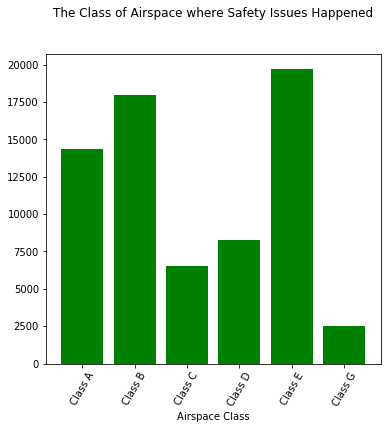

In [443]:
plt.bar(Airspace.index, Airspace.values, color='g')
plt.xticks(rotation=60)
plt.xlabel('Airspace Class')
plt.title('The Class of Airspace where Safety Issues Happened',y=1.1)
plt.subplots_adjust(top=1.2)
plt.show()

In [498]:
df.Month=df.Month.astype('int64')

In [499]:
df['Month']=pd.to_datetime(df['Month'], format='%Y%m')

In [582]:
Month=df.groupby('Month').count()['idx']

In [583]:
Year=Month.resample('Y').sum()

In [584]:
Month.index=Month.index.astype('str')
Month.index=Month.index.str.split('-')
Month.index=Month.index.str.get(1)
Year.index=Year.index.astype('str')
Year.index=Year.index.str.split('-')
Year.index=Year.index.str.get(0)

In [585]:
Month.index.unique()

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], dtype='object', name='Month')

In [586]:
for i in Month.index.unique():
    Month[i]=Month[i].sum()
Month=Month.drop_duplicates(keep='first')
Month

Month
01    7121
02    7126
03    8392
04    7822
05    8179
06    7846
07    7961
09    7281
10    7933
11    7265
12    6781
Name: idx, dtype: int64

#### What is the monthly and yearly change on Air conflicts?

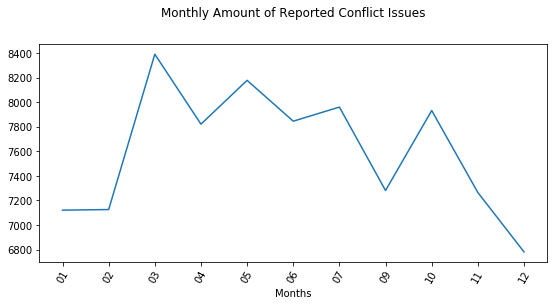

In [587]:
plt.plot(Month)
plt.title('Monthly Amount of Reported Conflict Issues',y=1.1)
plt.xlabel('Months')
plt.xticks(rotation=60)
plt.subplots_adjust(right=1.3)
plt.show()

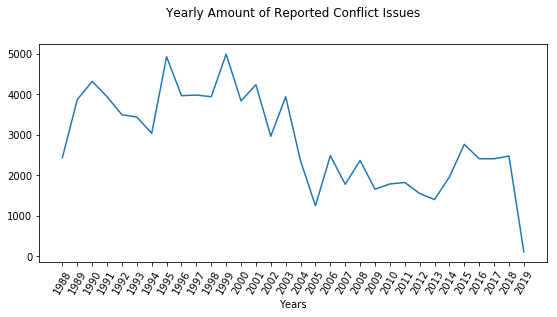

In [531]:
plt.plot(Year)
plt.title('Yearly Amount of Reported Conflict Issues',y=1.1)
plt.xlabel('Years')
plt.xticks(rotation=60)
plt.subplots_adjust(right=1.3)
plt.show()